In [1]:
# set tf 1.x for colab
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


Read about ill-conditioning: http://cnl.salk.edu/~schraudo/teach/NNcourse/precond.html

In [2]:
import tensorflow as tf
import sys
sys.path.append("../..")
from keras_utils import reset_tf_session
s = reset_tf_session()
print("We're using TF", tf.__version__)
from matplotlib import animation, rc
import matplotlib.pyplot as plt
import matplotlib_utils
from IPython.display import HTML, display_html
import numpy as np

Using TensorFlow backend.








We're using TF 1.15.0


In [3]:
def plot_gd(x_scale, lr, steps):
    y_guess = tf.Variable([1.5, 1.5], dtype='float32')
    y_true = tf.constant([0.2, 0.2], dtype='float32')

    # x is x_scale times more important in loss (creates valleys)
    loss = tf.reduce_mean((tf.multiply(y_guess, tf.constant([x_scale, 1.])) - y_true)**2)

    step = tf.train.GradientDescentOptimizer(lr).minimize(loss, var_list=y_guess)
    
    # nice figure settings
    fig, ax = plt.subplots(figsize=(5, 5))
    y_true_value = s.run(y_true)
    level_x = np.arange(-2, 2, 0.05)
    level_y = np.arange(-2, 2, 0.05)
    X, Y = np.meshgrid(level_x, level_y)
    Z = (X * x_scale - y_true_value[0])**2 + (Y - y_true_value[1])**2
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    s.run(tf.global_variables_initializer())
    ax.scatter(*s.run(y_true), c='red')
    contour = ax.contour(X, Y, Z, 10)
    ax.clabel(contour, inline=1, fontsize=10)
    line, = ax.plot([], [], lw=2)

    # start animation with empty trajectory
    def init():
        line.set_data([], [])
        return (line,)

    trajectory = [s.run(y_guess)]

    # one animation step (make one GD step)
    def animate(i):
        s.run(step)
        trajectory.append(s.run(y_guess))
        line.set_data(*zip(*trajectory))
        return (line,)

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=steps, interval=20, blit=True)

    anim.save(None, writer=matplotlib_utils.SimpleMovieWriter(0.0001))

<img src="%2BTl5ufo6erx8vP09fb3%2BPn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3%2BPn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBsssUETTzyKiIpZ3c4CgdST2Fcn8Jfj/8CPj5ZX2pfAr41%2BEfGttplwINSuPCXiS11JLSUjIjla3kcRsQCdrYOK6m/lt4bGaa7haSJImaWNIWkLKAcgIoJckfwgEnoAa%2BTv2JfilafGD41eMf2ofGvwp%2BIXgvVPEun6T4V8NeDNd%2BEOv6U2k6HZ3F9JaPdzXFjHFJczS3VxLJ5btDaRNBEWDeZJKAfR/g742/Bn4ieL9d%2BHvw/wDi54Y13X/C04h8TaHo%2Bv291eaRISwCXUMbs9uxKsAJApyp9DXT18PfsKfD/wCIOl/GH4U%2BGNW%2BFHijQ9R%2BE/wz8Y6D8Ste1nw1dWVnqep3%2Bs6XNC1rdTRrFqa3L2d3fedbvKsYceYUkmK17L%2B1B40/a%2B8GfGL4b%2BGfgv8AFL4babofxA8XyeHzb%2BKPhpqGp3dg8WharqjXHnQa1aJKGbTVjEflLtEpbe23BAPfKK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRWXYx/twan4qv/A%2Bn/tffBGbVtMt4Z9QsY/gVqxe3jl3eWW/4qjjdtJx1xg4wRlNpbkynCDSk7X0Xm97L5Jv5HvVFeM/8IP/AMFC/wDo6D4M/wDhh9W/%2Baisbxld/tqfD2Kwm8a/tjfA/TRqmpw6fpoufgXqwa5upW2xxIB4oyzE%2BnQAk4AJDFUqU6MHObSS6vRHv9FeM/8ACD/8FC/%2BjoPgz/4YfVv/AJqKP%2BEH/wCChf8A0dB8Gf8Aww%2Brf/NRQWezUV89Xms/tkWHxEsvhJdftnfA1fEuoWEt7a6KPgXqzTtbxkBpSo8UHYuTgFsbsHGdpxv/APCD/wDBQv8A6Og%2BDP8A4YfVv/moptNbkQqU6jai07Ozt0fZ%2BZ7NRXjP/CD/APBQv/o6D4M/%2BGH1b/5qKZdeEP8AgoFZW0l5eftUfBaGGFC8ssvwK1VVRQMliT4pwABzmkWe00V85fCzxf8Atc/G3S7/AF34TftrfAzX7DTdTk0%2B6vtO%2BBOrvB9oRVZlST/hKNsoAdfnQsucjOQQOn/4Qf8A4KF/9HQfBn/ww%2Brf/NRVSjKErSVmRCpCrBSg00%2Bq1R7NRXjP/CD/APBQv/o6D4M/%2BGH1b/5qKP8AhB/%2BChf/AEdB8Gf/AAw%2Brf8AzUVJZ7NRXjP/AAg//BQv/o6D4M/%2BGH1b/wCaij/hB/8AgoX/ANHQfBn/AMMPq3/zUUAezUV4yfBH/BQoDJ/ah%2BDIA6n/AIUPq3/zUVzPiDxl%2B1N4Sdo/FX7ff7OemMv3l1D4S30JH13%2BKxVRjKbtFXFKUYq7dj6Mor5QuP2kviZaOY7r/gqZ%2ByhEwPKyeAJlP6%2BLqsad8e/jDrDiLSf%2BCnP7LF0xOAtv8Orhyf8Avnxca0%2BrYhfYf3Mz9vQf2l96PqeivCNAt/23fFcXn%2BFv2yfgRqSYzv0/4K6lMMeuU8VGtH/hB/8AgoX/ANHQfBn/AMMPq3/zUVk007M0TTV0ezUV4z/wg/8AwUL/AOjoPgz/AOGH1b/5qKP%2BEH/4KF/9HQfBn/ww%2Brf/ADUUhns1FeM/8IP/AMFC/wDo6D4M/wDhh9W/%2Baij/hB/%2BChf/R0HwZ/8MPq3/wA1FAHs1FeM/wDCD/8ABQv/AKOg%2BDP/AIYfVv8A5qK5TQ/HP7V/iP4mat8GdI/be%2BBMnirQ1jbUtAf4GavHcojxrIsio/igGVNrLl03KD8pIIIqlGUr2WxEqlODSk0ruy832XmfSNFeM/8ACD/8FC/%2BjoPgz/4YfVv/AJqKP%2BEH/wCChf8A0dB8Gf8Aww%2Brf/NRUlns1FeI6v4c/b70LSrrXNW/ap%2BDENrZ27z3Mx%2BA2rkJGilmbA8UZOACeKoeBJP22Pid4SsfHfw//bF%2BB2r6PqUIlstQsfgZqrxyr9f%2BEo4IOQVOCCCCAQRTs7X6Ee0pqp7O65rXt1t3t21PfaK8Z/4Qf/goX/0dB8Gf/DD6t/8ANRWP46n/AG1/hl4ebxZ4/wD2w/ghpOmR3EMEl9efArVljR5ZFjQMf%2BEo%2BUFmUZPAzkkAE0gqVKdGm51GlFatvRJd2z36ivCfAnjv9qnwl%2B1T4a%2BCvxq%2BJPw88T6J4n%2BHniHXbe48J/D2%2B0W5tbnTr7RIEBefWL5JYnTVJSQEQgxoQ2Mg%2B7UFhRRRQAUUUUAFFFFABRRRQAV4z%2B1B/wAlv/Zx/wCyzX3/AKhXiivZq%2Bev27/iJonwp8afALx74gjmkt7D4w3pW3toy8txK/gzxOkUMajq7yMiAerClKSjFt7Izq1adClKpUdoxTbfZLVs9F%2BOfxY1jwalh8P/AIb2MWoeNfEjNFoVlKf3Vsg/1l7cY%2B7BEDk92bCjknFz4X/Dfwr8BvAtz9v10TXEjPqHifxLqkipJfXBGZbiZycKvHAzhFAHbNZnwF%2BGXiLR3v8A4ufFRY5fGvidVfUVVtyaXajmHT4T2SMH5iPvyFmJPBrB%2BO/ji88bDxN8JNM8EXF3baLDZXGp6nb3EE01tNuW5hlWxZg1xCpjUtuZNxV0XOCwxowlUl7SfyXZf5vr93r4Eq0qcHmGIi%2BdpqlBp%2B6rN2dk7SkleT2ivd6Nv1nQ/EOgeJ9PXVvDWuWeo2rOyrdWNyk0ZZThgGQkZBBBHauJ0b4BWj/G2/8Ajp4/8RyeINTiBt/CNrPbCO38PWhRRIsKZIaaRtxec/MV2qAqgg8x8EtF8Yav8QbL4o2HgbRtF07V9EkbxFqWgauZLDX5v3X2W5ht8K0b7RIS8iiRVIjLPtDD2mul%2B7sduG9nmtGFWvT%2BCV4/Ek2lpKztffS6aUleLdlIK8Y%2BMf7QPjLWvHEv7Of7L1naan41ESt4g128UvpvhK3fpNckf624YZMVsDubG5tqDmH42fGTx5488ey/svfszX8cXiQQpJ4x8XtEJbbwlZyDg46SXsi58qHt998KOfQfgt8FfAfwF8DQ%2BBPAGnyJCJWnvr67lMt1qN05zLdXEp5lmc8sx9gMAADWMY0oqU1d9F%2Br/RdfTeKtetmNWVDDS5YRdpzW9%2BsIef8ANL7Oy96/Ll/Af9nXwZ8CNOvLqwu7vWvEmtSCfxP4v1h/Mv8AVp8fekf%2BCNeiRLhEXgDqT6BRXg/xP/aQ8ffEfx3ffs8/sdWtnqHiGwk8nxb45v4jLpHhPPVGwcXd7j7tspwpwZCoBFKEKuIm397eyXn/AF5I674TK8PGnCNltGK3b307t7tvzbe7Ou%2BPX7Ufw/8AgTPZeFprS%2B8ReMN

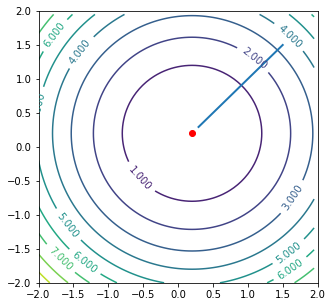

In [4]:
plot_gd(x_scale=1.0, lr=0.1, steps=25)

<img src="%2BTl5ufo6erx8vP09fb3%2BPn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3%2BPn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBsssUETTzyKiIpZ3c4CgdST2Fcn8Jfj/8CPj5ZX2pfAr41%2BEfGttplwINSuPCXiS11JLSUjIjla3kcRsQCdrYOK6m/lt4bGaa7haSJImaWNIWkLKAcgIoJckfwgEnoAa%2BTv2JfilafGD41eMf2ofGvwp%2BIXgvVPEun6T4V8NeDNd%2BEOv6U2k6HZ3F9JaPdzXFjHFJczS3VxLJ5btDaRNBEWDeZJKAfR/g742/Bn4ieL9d%2BHvw/wDi54Y13X/C04h8TaHo%2Bv291eaRISwCXUMbs9uxKsAJApyp9DXT18PfsKfD/wCIOl/GH4U%2BGNW%2BFHijQ9R%2BE/wz8Y6D8Ste1nw1dWVnqep3%2Bs6XNC1rdTRrFqa3L2d3fedbvKsYceYUkmK17L%2B1B40/a%2B8GfGL4b%2BGfgv8AFL4babofxA8XyeHzb%2BKPhpqGp3dg8WharqjXHnQa1aJKGbTVjEflLtEpbe23BAPfKK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRXDeOPi7%2B0l8OdZh8M%2BLP28fgJDqs8yxRaRbfA3V7m7ZycAeRD4oaQc9yoHvxQYYjFYbCU%2BevNQj3k0l97Pp%2BivGf%2BEH/wCChf8A0dB8Gf8Aww%2Brf/NRR/wg/wDwUL/6Og%2BDP/hh9W/%2Baig3PZqK8M1PSv26dEu7Sw1n9r74GWk9/N5VjDdfBHU43uZOuyMN4pBdvYZNXf8AhB/%2BChX/AEdB8Gf/AAw%2Brf8AzUUCUottJ7Hs1FeFeIrD9uTwhpzax4t/bD%2BBWl2iffutR%2BCepwRr9WfxUAK4Twt%2B0R8d/Hnj61%2BGXgL9vr4Ea/rF27rFFoXwE1u8hUqjOS88PiZoYxhTgs4ycAZJAqlCcldI5q2NwWHqRp1asYyk7JNpNt7JJvVs%2BsKK8Z/4Qf8A4KF/9HQfBn/ww%2Brf/NRR/wAIP/wUL/6Og%2BDP/hh9W/8AmoqTqPZqK8Z/4Qf/AIKF/wDR0HwZ/wDDD6t/81FH/CD/APBQv/o6D4M/%2BGH1b/5qKAPZqK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRR/wg/8AwUL/AOjoPgz/AOGH1b/5qKAPZqK8Z/4Qf/goX/0dB8Gf/DD6t/8ANRR/wg//AAUL/wCjoPgz/wCGH1b/AOaigD2aivGH8E/8FCI1LyftR/BhQByT8CNWAH/l01kajdftmaQSNW/bY%2BANqR1%2B0fBrUUx/314qFNJvYmU4QV5Ox79RXzTefE79ozTyRf8A/BRL9mmAjr53wtvFx%2Bfiys%2Bb48fGW3OLj/gpt%2ByymP7/AMObgfz8W1apVXtF/cYPG4OO9SP3r/M%2BpqK%2BVP8Ahof4rZx/w9D/AGVM/wDZPZ//AJrqki%2BPfxinOIP%2BCnH7LDn/AGPh1cH/AN26n7Gt/K/uZP1/Av8A5ex/8CX%2BZ9T0V8z2nxT/AGh78gWP/BRf9mebPTyvhfdt/LxZWvp%2Bpfti6uQNK/bf/Z%2Buien2f4Oag%2Bfy8VmpdOa3TNY4nDz%2BGafzR9A0V4vF4M/4KCzxiWD9qX4Lup6MnwJ1Yg/%2BXTTv%2BEH/AOChf/R0HwZ/8MPq3/zUVBsezUV4z/wg/wDwUL/6Og%2BDP/hh9W/%2Baij/AIQf/goX/wBHQfBn/wAMPq3/AM1FAHs1FeM/8IP/AMFC/wDo6D4M/wDhh9W/%2Baij/hB/%2BChf/R0HwZ/8MPq3/wA1FAHs1FeM/wDCD/8ABQv/AKOg%2BDP/AIYfVv8A5qKP%2BEH/AOChf/R0HwZ/8MPq3/zUUAezUV4z/wAIP/wUL/6Og%2BDP/hh9W/8Amorzz4i/HX9oj4ReM08BfFH9ur4H6BqEsCTRNqv7P%2BuQ2zq%2BcYuW8S%2BTn5Tld%2BR3AyKcYyk7JXMMRisLg6fPXmoRva8mkr9rs%2BqaK8F%2BHPxG/af0H9p/wt8I/i58Uvhx4u8O%2BLvhxr/iGxvvB3gC90eeGbT73Q4Yv3k2sXyTQyR6rISAinMaEMQSD71SNk01dBRRRQMKKKKACiiigAooooAK%2Bfv25P8AhYx%2BIf7PKfCg6KuuN8aLtbWTxB5ptY1PgzxPvZ1i%2BdiE3EKCMtgEgZNfQNeMftSOkXxr/ZzkkcKq/GW/LMxwAP8AhCfFHNBnVh7SnKF2rq11o16PuSD9ljxT49/f/tDftAeJfE0b/wCs0LQ5f7E0sr/caO2YSyj3klOfSux8NfDX4Pfs/eFrq%2B%2BH3wws9Lt7a3LzR%2BHtDMt1cAdsRK0s7nj%2B8TXJ%2BLf22/gfo%2BuS%2BDfAF1qfj/xDCcSaF4A05tTljPT97KhEEGD18yRcfhXpfg7Wdb8Q%2BFLDXPEPhO40O/urZZLnR7u5ilktHI5jZ4mZGI9VJFU6coWckeJgKORuvL6padWK1nrUa8nUbbv/AHea/kc7pPxu0TX/AAR4j8WadoGqWt14Zjm/tLRtXtTb3EUi263CowG4DfG8bAgnhxnnIryC5%2BPl746%2BHulQ%2BIfifLG15r%2BmXevXGj6Re6Isejzny2%2BzTtIXkiW4wGuY3%2BYbgMKymu4%2BEnwk8W%2BG/E%2Bv6xYeENL8JaJqvlofDpv31D7XJ5shnvJQpRIpJEZFG1n6EvnhQth4F/Z3%2BEvjm28J%2BJPH1u99remy6boHhfxBqUDpBZTTh3treIqGaN5QijzC5yqIpwAtbx9nGTSVzlqrNcXSg5tRT5ou90nr7rteLd1o046vZJNteX65aS6peaonxbtdT8SaRYaHq/g1tds9Ge%2BvbW9ilgktZ0WFC6zSrMyGRV/1lpESRnNfRXw7j8Ual8K9Dh8fNJHrM%2BgWy6y0TNG63JgUSkEYKHfuI6EfhXl7/tE%2BAPhV4Q13RPh78HrjRdL0Sz1seHJLextorHUr3TRIbqCOK3kMkbB45MCRI2k8uQrngt03wg%2BJ3jTUfGt18M/iRqui6let4cs9e0fW9Bs5Le21C1nklSRUjkklIMLJEM7zuSeJuCSBVWFRwva1v6/4f/gMvK4YfDYm3PzOSs97X6Jt6yWj5W11evvRRm%2BHf2Ev2V9C1Fdd1T4U2/iPUxy2qeMrubWJ3b%2B9m8eQA9/lAr1TSNF0fw/YJpWg6TbWVrEMR21pAscaD2VQAK4b4y%2BPv2gPDWq2eg/BH4B2vilru3Z7jWdV8VQ6dZWD7sBXGySaQ4%2BbCJjHcGuN/wCFaft6%2BP8A5/G37SPhHwPAeGsfAHhE3sxU9R9q1F2APuIB9BU8k6kVKc0l5u/4K7/A7KawOXz

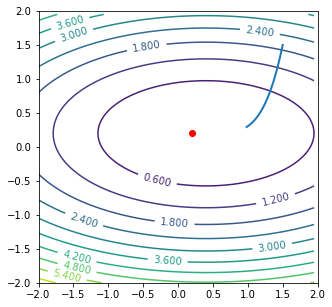

In [5]:
# narrow valleys
plot_gd(x_scale=0.5, lr=0.1, steps=25)

<img src="%2BTl5ufo6erx8vP09fb3%2BPn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3%2BPn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBsssUETTzyKiIpZ3c4CgdST2Fcn8Jfj/8CPj5ZX2pfAr41%2BEfGttplwINSuPCXiS11JLSUjIjla3kcRsQCdrYOK6m/lt4bGaa7haSJImaWNIWkLKAcgIoJckfwgEnoAa%2BTv2JfilafGD41eMf2ofGvwp%2BIXgvVPEun6T4V8NeDNd%2BEOv6U2k6HZ3F9JaPdzXFjHFJczS3VxLJ5btDaRNBEWDeZJKAfR/g742/Bn4ieL9d%2BHvw/wDi54Y13X/C04h8TaHo%2Bv291eaRISwCXUMbs9uxKsAJApyp9DXT18PfsKfD/wCIOl/GH4U%2BGNW%2BFHijQ9R%2BE/wz8Y6D8Ste1nw1dWVnqep3%2Bs6XNC1rdTRrFqa3L2d3fedbvKsYceYUkmK17L%2B1B40/a%2B8GfGL4b%2BGfgv8AFL4babofxA8XyeHzb%2BKPhpqGp3dg8WharqjXHnQa1aJKGbTVjEflLtEpbe23BAPfKK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRR/wg/8AwUL/AOjoPgz/AOGH1b/5qKAPZqK8Z/4Qf/goX/0dB8Gf/DD6t/8ANRR/wg//AAUL/wCjoPgz/wCGH1b/AOaigD2aivFo/CH/AAUCmkaKL9qj4LM6ffVfgVqpK/Uf8JTxVO20/wDbkvdbufDVn%2B2H8CptRs41kvNPi%2BCeptPAh6M8Y8VblB7EiizJc4K13ue60V87weJv2tbvw1qHjOx/bp/Z8udJ0l2TU9RtPg5qMsNq6nDLI6eKiEYHgg85rT8L2H7dHjXQrfxP4T/a6%2BCOoafdpvtry1%2BBequkgzjgjxT603FrdEQr0KklGM021fRrba/pfqe60V4z/wAIP/wUL/6Og%2BDP/hh9W/8Amoo/4Qf/AIKF/wDR0HwZ/wDDD6t/81FI1PZqK8Z/4Qf/AIKF/wDR0HwZ/wDDD6t/81FH/CD/APBQv/o6D4M/%2BGH1b/5qKAPZqK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRR/wg/8AwUL/AOjoPgz/AOGH1b/5qKAPZqK8Z/4Qf/goX/0dB8Gf/DD6t/8ANRR/wg//AAUL/wCjoPgz/wCGH1b/AOaigD2aivFpvB//AAUCtxuuP2qPgsg9X%2BBOqj%2Bfimqc9j%2B3Ha/8fP7YnwKjx18z4J6mP5%2BKqLMlzhHdnutFfP8ANqP7Y1v/AMfH7b37P8f%2B/wDBzUB/PxXVWXxZ%2B1ZB/r/29f2dU/3/AIR3w/8Adrp8suxk8Tho7zX3o%2BiqK%2BbZPiH%2B0tD/AK7/AIKE/s2J/vfCq8H/ALtlQSfFb9oWL/W/8FGf2Zl/3vhfdj/3bKfJPsZvH4Fb1Y/%2BBL/M%2BmaK%2BYH%2BMvx2j/1n/BSb9mBfr8NLof8Au21G3xw%2BNiff/wCCl/7Lg%2Bvw3uf/AJrafs6nZkvMsuX/AC%2Bh/wCBL/M%2Bo6K%2BWj8ePjKOv/BTX9lof905uP8A5raT/hfXxi/6Scfss/8Ahurj/wCa6j2dTsxf2nlv/P8Ah/4FH/M%2BpqK%2BWR8evjGen/BTf9ln/wANzcf/ADW05fjr8Z24X/gpn%2By2fp8OLn/5raPZ1OzD%2B08t/wCf8P8AwKP%2BZ9SUV8vL8bPjg/3P%2BCln7Lx%2Bnw2uf/mtqRPi/wDHyT/V/wDBSH9mJv8Ad%2BGV0f8A3baPZz7MazHL3tWh/wCBL/M%2BnaK%2BaI/if%2B0ZL/qv%2BCif7NDf7vwtvD/7tlWIvHX7T8/%2Bp/4KA/s4P/u/Ce9P/u2UuSfYtY7BParH/wACX%2BZ9H0V88w%2BIf2t7j/Uft2fs8vn%2B58IL8/y8V1ahk/bSuf8Aj3/bT%2BAcmemz4Maif5eKqXLLsaLEYeW0196PfKK8J8CeO/2qfCX7VPhr4K/Gr4k/DzxPonif4eeIddt7jwn8Pb7Rbm1udOvtEgQF59YvklidNUlJARCDGhDYyD7tSNgooooAKKKKACiiigAooooAK%2BfP26PiV4K%2BEfxB/Z68d/ELWTYaVa/Gm6We5FtLMVZ/BnidFASJWc5ZgOAetfQdeM/tQf8AJb/2cf8Ass19/wCoV4opq19SKiqOm1TaUraNq6T81dXXldeqGf8ADfX7Pl5x4ai8a60ew0n4caxJn6E2oB/Ok/4bUsrn/kD/ALLvxovQfulfh7Lbg/jcvHXtVBIAyTgDqTWnNSX2fx/4CPL%2Bq5zL4sTFf4adv/SpyPFv%2BGqPizqX/ItfsOfE2XP3f7Um0my/PfenFeo%2BANe8T%2BJ/CFnrvjLwLceGtSuFc3OiXd9BcyWpDsqhpIGaNsqA3yk43YPINM1j4l/Djw7n/hIPiBoljt%2B99s1WGLH/AH0wq/oHiLQPFekQ%2BIPC2uWepWFwGNve2F0k0MuGKna6EqcMCDg8EEdqUtY6Rt95thKVWnWftMS6jt8LUEltr7sVLy1dtdtjwjwJf/C/wt%2B1FqWteAtc8Ky6XNot1FqsHhLS0tRpUwuYOdQaJ2W4nklLqhZY2X5htbLMOfTwZqur%2BNU8CaZ4dvYvFsGv%2BJJde1RtPkSOWwu7O4FvM1wVCSKxe1jChiysCdo2E16v4G8cfFOH45X/AMLPGmu6FrVumgf2nJPomjy2p0pmn8uG3mLzzCQyJvZT8hPlMQuOnGWvxh%2BK/g3xt4ut/iTqmvQSl9WPgbTbzw/aR6Zfpb25uIxHPETO7iNJGIkKbgrYBIGepKbk7W2%2B/wDD%2BtzwKmDw6pxU21H2jvaOi1Tau5u12kk03a7ilqkuZ03wn4v17SbTxR4b%2BHGvWMfhrSvCbazpdzo01vNe3On3Qe4ggSVV%2B0tFAkiK6bo3MihHbnHsX7O%2Bk6zbad4o8T6lo97p1t4j8Y3eqaXYalbtDcQ27xQx/vI25jLyRSybTziQE8k15JL8Vvi/pmi2Xg7V/infan/wlMfhe5HiCK1tYbnTIdSukt7hYTDEsYUM6%2BUzozKudzOea9a/Z18R%2BI9T0vxN4U8Saxc6k/hTxddaPa6pesGnu4EigljeVlADSATbGYAZKHgHNKtCaptu39WNMqpYeGLg05Xs90kr3l2b6X2uno9yj49%2BEf7R/ibxbe6v4O/a3uvDekzups9HtfBGn3LWwCKCPOnDF8sGbJHG7Hasj/hmr4/3n/Ia/bt8cSZ6/YfD%2BjW3/oNocVo/EH9oT4u%2BFfGN94U8G/seeN/E0Fo6rFrNnqWl21pdZRWzGZ7pXwCSp3KOVPbmsb/hoL9sK5GbH/gn/qUeen9ofEnR4/z8t5MVMYV%2BVW5fvh%2BupvWpZS6

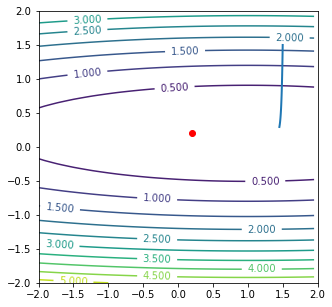

In [6]:
# narrower valleys
plot_gd(x_scale=0.2, lr=0.1, steps=25)

<img src="%2BTl5ufo6erx8vP09fb3%2BPn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3%2BPn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBsssUETTzyKiIpZ3c4CgdST2Fcn8Jfj/8CPj5ZX2pfAr41%2BEfGttplwINSuPCXiS11JLSUjIjla3kcRsQCdrYOK6m/lt4bGaa7haSJImaWNIWkLKAcgIoJckfwgEnoAa%2BTv2JfilafGD41eMf2ofGvwp%2BIXgvVPEun6T4V8NeDNd%2BEOv6U2k6HZ3F9JaPdzXFjHFJczS3VxLJ5btDaRNBEWDeZJKAfR/g742/Bn4ieL9d%2BHvw/wDi54Y13X/C04h8TaHo%2Bv291eaRISwCXUMbs9uxKsAJApyp9DXT18PfsKfD/wCIOl/GH4U%2BGNW%2BFHijQ9R%2BE/wz8Y6D8Ste1nw1dWVnqep3%2Bs6XNC1rdTRrFqa3L2d3fedbvKsYceYUkmK17L%2B1B40/a%2B8GfGL4b%2BGfgv8AFL4babofxA8XyeHzb%2BKPhpqGp3dg8WharqjXHnQa1aJKGbTVjEflLtEpbe23BAPfKK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRR/wg/8AwUL/AOjoPgz/AOGH1b/5qKAPZqK8Z/4Qf/goX/0dB8Gf/DD6t/8ANRR/wg//AAUL/wCjoPgz/wCGH1b/AOaigD2aivFo/CH/AAUCmkaKL9qj4LM6ffVfgVqpK/Uf8JTxVO20/wDbkvdbufDVn%2B2H8CptRs41kvNPi%2BCeptPAh6M8Y8VblB7EiizJc4K13ue60V87weJv2tbvw1qHjOx/bp/Z8udJ0l2TU9RtPg5qMsNq6nDLI6eKiEYHgg85rT8L2H7dHjXQrfxP4T/a6%2BCOoafdpvtry1%2BBequkgzjgjxT603FrdEQr0KklGM021fRrba/pfqe60V4z/wAIP/wUL/6Og%2BDP/hh9W/8Amoo/4Qf/AIKF/wDR0HwZ/wDDD6t/81FI1PZqK8Z/4Qf/AIKF/wDR0HwZ/wDDD6t/81FH/CD/APBQv/o6D4M/%2BGH1b/5qKAPZqK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRR/wg/8AwUL/AOjoPgz/AOGH1b/5qKAPZqK8Z/4Qf/goX/0dB8Gf/DD6t/8ANRR/wg//AAUL/wCjoPgz/wCGH1b/AOaigD2aivFpvB//AAUCtxuuP2qPgsg9X%2BBOqj%2Bfimqc9j%2B3Ha/8fP7YnwKjx18z4J6mP5%2BKqLMlzhHdnutFfP8ANqP7Y1v/AMfH7b37P8f%2B/wDBzUB/PxXVWXxZ%2B1ZB/r/29f2dU/3/AIR3w/8Adrp8suxk8Tho7zX3o%2BiqK%2BbZPiH%2B0tD/AK7/AIKE/s2J/vfCq8H/ALtlQSfFb9oWL/W/8FGf2Zl/3vhfdj/3bKfJPsZvH4Fb1Y/%2BBL/M%2BmaK%2BYH%2BMvx2j/1n/BSb9mBfr8NLof8Au21G3xw%2BNiff/wCCl/7Lg%2Bvw3uf/AJrafs6nZkvMsuX/AC%2Bh/wCBL/M%2Bo6K%2BWj8ePjKOv/BTX9lof905uP8A5raT/hfXxi/6Scfss/8Ahurj/wCa6j2dTsxf2nlv/P8Ah/4FH/M%2BpqK%2BWR8evjGen/BTf9ln/wANzcf/ADW05fjr8Z24X/gpn%2By2fp8OLn/5raPZ1OzD%2B08t/wCf8P8AwKP%2BZ9SUV8vL8bPjg/3P%2BCln7Lx%2Bnw2uf/mtqRPi/wDHyT/V/wDBSH9mJv8Ad%2BGV0f8A3baPZz7MazHL3tWh/wCBL/M%2BnaK%2BaI/if%2B0ZL/qv%2BCif7NDf7vwtvD/7tlWIvHX7T8/%2Bp/4KA/s4P/u/Ce9P/u2UuSfYtY7BParH/wACX%2BZ9H0V88w%2BIf2t7j/Uft2fs8vn%2B58IL8/y8V1ahk/bSuf8Aj3/bT%2BAcmemz4Maif5eKqXLLsaLEYeW0196PfKK8J8CeO/2qfCX7VPhr4K/Gr4k/DzxPonif4eeIddt7jwn8Pb7Rbm1udOvtEgQF59YvklidNUlJARCDGhDYyD7tSNgooooAKKKKACiiigAooooAK%2BfP26PiV4K%2BEfxB/Z68d/ELWTYaVa/Gm6We5FtLMVZ/BnidFASJWc5ZgOAetfQdeM/tQf8AJb/2cf8Ass19/wCoV4opq19SKiqOm1TaUraNq6T81dXXldeqGf8ADfX7Pl5x4ai8a60ew0n4caxJn6E2oB/Ok/4bUsrn/kD/ALLvxovQfulfh7Lbg/jcvHXtVBIAyTgDqTWnNSX2fx/4CPL%2Bq5zL4sTFf4adv/SpyPFv%2BGqPizqX/ItfsOfE2XP3f7Um0my/PfenFeo%2BANe8T%2BJ/CFnrvjLwLceGtSuFc3OiXd9BcyWpDsqhpIGaNsqA3yk43YPINM1j4l/Djw7n/hIPiBoljt%2B99s1WGLH/AH0wq/oHiLQPFekQ%2BIPC2uWepWFwGNve2F0k0MuGKna6EqcMCDg8EEdqUtY6Rt95thKVWnWftMS6jt8LUEltr7sVLy1dtdtjwjwJf/C/wt%2B1FqWteAtc8Ky6XNot1FqsHhLS0tRpUwuYOdQaJ2W4nklLqhZY2X5htbLMOfTwZqur%2BNU8CaZ4dvYvFsGv%2BJJde1RtPkSOWwu7O4FvM1wVCSKxe1jChiysCdo2E16v4G8cfFOH45X/AMLPGmu6FrVumgf2nJPomjy2p0pmn8uG3mLzzCQyJvZT8hPlMQuOnGWvxh%2BK/g3xt4ut/iTqmvQSl9WPgbTbzw/aR6Zfpb25uIxHPETO7iNJGIkKbgrYBIGepKbk7W2%2B/wDD%2BtzwKmDw6pxU21H2jvaOi1Tau5u12kk03a7ilqkuZ03wn4v17SbTxR4b%2BHGvWMfhrSvCbazpdzo01vNe3On3Qe4ggSVV%2B0tFAkiK6bo3MihHbnHsX7O%2Bk6zbad4o8T6lo97p1t4j8Y3eqaXYalbtDcQ27xQx/vI25jLyRSybTziQE8k15JL8Vvi/pmi2Xg7V/infan/wlMfhe5HiCK1tYbnTIdSukt7hYTDEsYUM6%2BUzozKudzOea9a/Z18R%2BI9T0vxN4U8Saxc6k/hTxddaPa6pesGnu4EigljeVlADSATbGYAZKHgHNKtCaptu39WNMqpYeGLg05Xs90kr3l2b6X2uno9yj49%2BEf7R/ibxbe6v4O/a3uvDekzups9HtfBGn3LWwCKCPOnDF8sGbJHG7Hasj/hmr4/3n/Ia/bt8cSZ6/YfD%2BjW3/oNocVo/EH9oT4u%2BFfGN94U8G/seeN/E0Fo6rFrNnqWl21pdZRWzGZ7pXwCSp3KOVPbmsb/hoL9sK5GbH/gn/qUeen9ofEnR4/z8t5MVMYV%2BVW5fvh%2BupvWpZS6

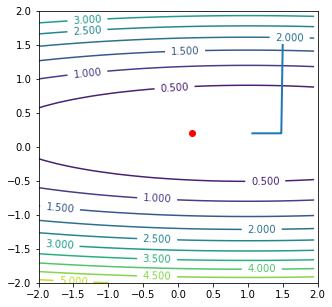

In [13]:
# bigger learning rate then?
# x is changed faster, but y changes are too big, leads to oscillation
plot_gd(x_scale=0.2, lr=1, steps=50)